In [1]:
import keras
from keras import backend as K
from keras.models import Sequential, model_from_json
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy

import cv2
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Neural Network class

In [4]:
class NeuralNetwork:
    model = None
    learningRate = 0.001
    batchSize = 90
    epochs = 50
    
    def __init__(self):
        self.model = Sequential([
            Flatten(),
            Dense(200, activation='sigmoid'),
            Dense(100, activation='sigmoid'),
            Dense(300, activation='sigmoid'),
            Dense(63, activation='softmax')
        ])
        
        self.model.compile(
            Adam(lr=self.learningRate),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
    def train(self,x_train,y_train):
        self.model.fit(x_train, y_train, validation_split=0.2, batch_size=self.batchSize, epochs=self.epochs)
        
    def getAccuracy(self,x,y):
        predictions = self.predict(x)
        nr=0
        for i in range(np.size(predictions,0)):
            if predictions[i] == y[i]:
                nr = nr+1
        return (nr* 100 / np.size(predictions,0))
    
    def predict(self,x_test):
        return self.model.predict_classes(x_test)
    

# Helper class

In [5]:
class Helper:
    
    dictionary = {
            0: '0',
            1: '1',
            2: '2',
            3: '3',
            4: '4',
            5: '5',
            6: '6',
            7: '7',
            8: '8',
            9: '9',
            10: 'A',
            11: 'B',
            12: 'C',
            13: 'D',
            14: 'E',
            15: 'F',
            16: 'G',
            17: 'H',
            18: 'I',
            19: 'J',
            20: 'K',
            21: 'L',
            22: 'M',
            23: 'N',
            24: 'O',
            25: 'P',
            26: 'Q',
            27: 'R',
            28: 'S',
            29: 'T',
            30: 'U',
            31: 'V',
            32: 'W',
            33: 'X',
            34: 'Y',
            35: 'Z',
            36: 'a',
            37: 'b',
            38: 'c',
            39: 'd',
            40: 'e',
            41: 'f',
            42: 'g',
            43: 'h',
            44: 'i',
            45: 'j',
            46: 'k',
            47: 'l',
            48: 'm',
            49: 'n',
            50: 'o',
            51: 'p',
            52: 'q',
            53: 'r',
            54: 's',
            55: 't',
            56: 'u',
            57: 'v',
            58: 'w',
            59: 'x',
            60: 'y',
            61: 'z',
            62: ' '
        }

#     def removeEmptyRows(self,image):
#         result = []

#         for row in range(image.shape[0]):
#             currentRow = image[row]
#             if np.sum(currentRow) != 0:
#                 result.append(currentRow)

#         result = np.asarray(result)
#         result.dtype=image.dtype
#         return result
    
    
#     def removeEmptyCols(self,image):    
#         result = np.zeros((image.shape[0],0),image.dtype)
#         try:
#             for col in range(image.shape[1]):
#                 currentCol = image[:,[col,col]]
#                 if np.sum(currentCol) != 0:
#                     result = np.hstack((result, np.atleast_2d(currentCol))) 

#             result = np.asarray(result)
#             result.dtype=image.dtype
#             return result
#         except:
#             print (image.shape)
    
    def loadTrainImage(self,path):
        img = cv2.imread(path);
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = 255 - img
        img = cv2.resize(img,(28,28))
        img = keras.utils.normalize(img, axis=1)
        return img

    
    def loadMnist(self):
        mnist = keras.datasets.mnist
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = keras.utils.normalize(x_train, axis=1)
        x_test = keras.utils.normalize(x_test, axis=1)
        return (x_train,y_train,x_test,y_test)
    
    
    def loadTrainingSet(self):
        x_train = []
        y_train = []
        
        for i in range(1,63):
            folderName = "Sample"
            nrFolder = ""
            if i<=9:
                nrFolder = "00"+str(i)
            else:
                nrFolder = "0"+str(i)
            folderName = folderName + nrFolder   
            for j in range(1,1017):
                imageName = "";
                if j<=9:
                    imageName = "img" + nrFolder + "-0000" + str(j)
                elif j<=99:
                    imageName = "img" + nrFolder + "-000" + str(j)
                elif j<=999:
                    imageName = "img" + nrFolder + "-00" + str(j)
                else:
                    imageName = "img" + nrFolder + "-0" + str(j)
                    
                image = self.loadTrainImage("./trainingSet/" + folderName + "/" + imageName + ".png")
#                 image = self.removeEmptyCols(self.removeEmptyRows(image))
                x_train.append(image)
                y_train.append(i-1)
            print("load '", self.dictionary[i-1],"' from ", folderName," ...")
                
        x_train = np.asarray(x_train)
        y_train = np.asarray(y_train)
        x_train,y_train = shuffle(x_train,y_train)
        return (x_train,y_train)
    
    def showImage(self,image,label):
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(image, cmap=plt.cm.binary)
        plt.show()
        
    def showConfusionMatrix(self,matrix,classes):
        plt.imshow(matrix,interpolation='nearest',cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks,classes,rotation=45)
        plt.yticks(tick_marks,classes)

        thresh = matrix.max()/2.
        for i,j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
            plt.text(j,i,matrix[i,j],
                    horizontalalignment='center',
                    color='white' if matrix[i,j] > thresh else 'black')

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
                

# Load data

In [4]:
helper = Helper()
x_train,y_train = helper.loadTrainingSet()

load ' 0 ' from  Sample001  ...
load ' 1 ' from  Sample002  ...
load ' 2 ' from  Sample003  ...
load ' 3 ' from  Sample004  ...
load ' 4 ' from  Sample005  ...
load ' 5 ' from  Sample006  ...
load ' 6 ' from  Sample007  ...
load ' 7 ' from  Sample008  ...
load ' 8 ' from  Sample009  ...
load ' 9 ' from  Sample010  ...
load ' A ' from  Sample011  ...
load ' B ' from  Sample012  ...
load ' C ' from  Sample013  ...
load ' D ' from  Sample014  ...
load ' E ' from  Sample015  ...
load ' F ' from  Sample016  ...
load ' G ' from  Sample017  ...
load ' H ' from  Sample018  ...
load ' I ' from  Sample019  ...
load ' J ' from  Sample020  ...
load ' K ' from  Sample021  ...
load ' L ' from  Sample022  ...
load ' M ' from  Sample023  ...
load ' N ' from  Sample024  ...
load ' O ' from  Sample025  ...
load ' P ' from  Sample026  ...
load ' Q ' from  Sample027  ...
load ' R ' from  Sample028  ...
load ' S ' from  Sample029  ...
load ' T ' from  Sample030  ...
load ' U ' from  Sample031  ...
load ' V

# Show sample

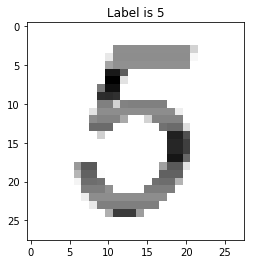

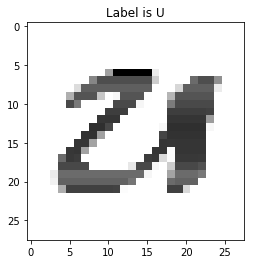

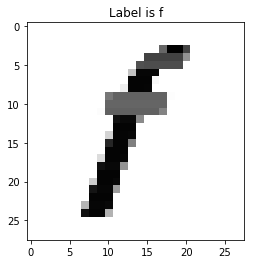

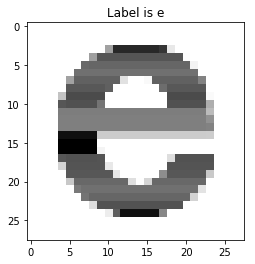

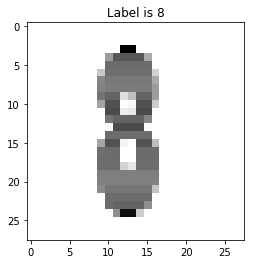

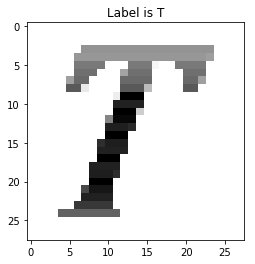

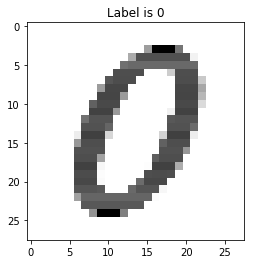

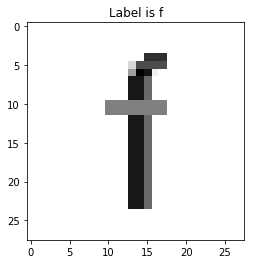

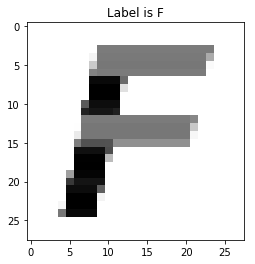

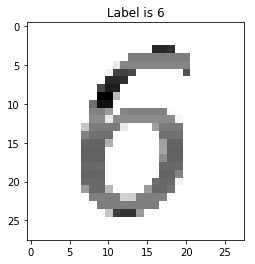

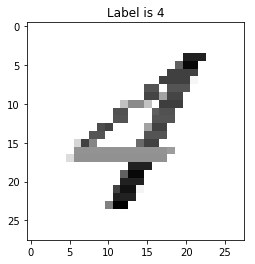

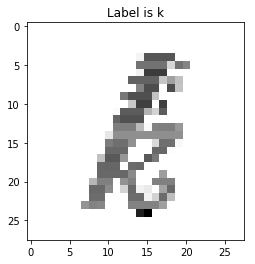

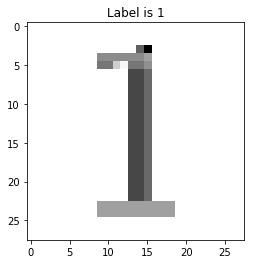

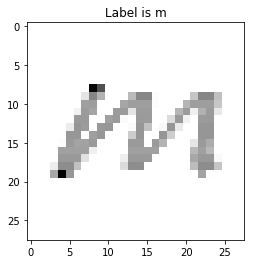

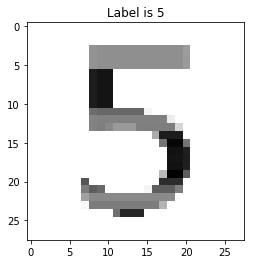

In [5]:
for i in range(15):
    helper.showImage(x_train[i],helper.dictionary[y_train[i]])

# Training network

In [299]:
network = NeuralNetwork()
network.train(x_train,y_train)
print('Acuratetea dupa antrenare: ',network.getAccuracy(x_train,y_train))

Train on 50393 samples, validate on 12599 samples
Epoch 1/50
50393/50393 [==============================] - 3s 67us/step - loss: 2.9536 - acc: 0.2593 - val_loss: 1.8197 - val_acc: 0.5315
Epoch 2/50
50393/50393 [==============================] - 3s 58us/step - loss: 1.4181 - acc: 0.6265 - val_loss: 1.2081 - val_acc: 0.6775
Epoch 3/50
50393/50393 [==============================] - 3s 55us/step - loss: 1.0322 - acc: 0.7161 - val_loss: 0.9650 - val_acc: 0.7278
Epoch 4/50
50393/50393 [==============================] - 3s 50us/step - loss: 0.8578 - acc: 0.7542 - val_loss: 0.8468 - val_acc: 0.7532
Epoch 5/50
50393/50393 [==============================] - 3s 50us/step - loss: 0.7565 - acc: 0.7750 - val_loss: 0.7794 - val_acc: 0.7693
Epoch 6/50
50393/50393 [==============================] - 3s 50us/step - loss: 0.6882 - acc: 0.7900 - val_loss: 0.7239 - val_acc: 0.7783
Epoch 7/50
50393/50393 [==============================] - 3s 58us/step - loss: 0.6348 - acc: 0.8020 - val_loss: 0.6946 - val_acc

# Confusion matrix

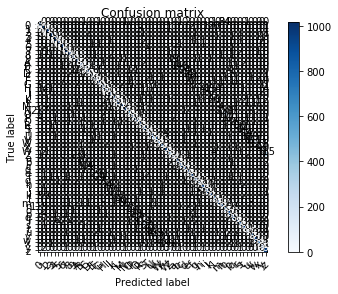

In [23]:
predictions = network.predict(x_train)
labels = ['0','1','2','3','4','5','6','7','8','9',
          'A','B','C','D','E','F','G','H','I','J',
          'K','L','M','N','O','P','Q','R','S','T',
          'U','V','W','X','W','Z','a','b','c','d',
          'e','f','g','h','i','j','k','l','m','n',
          'o','p','q','r','s','t','u','v','w','x',
          'y','z',]
cm = confusion_matrix(y_train,predictions)
helper.showConfusionMatrix(cm,labels)

# Save Keras model

In [321]:
modelJson = network.model.to_json()
with open("model.json","w") as jsonFile:
    jsonFile.write(modelJson)
network.model.save_weights("weights.h5")

# Load Keras model

In [8]:
json = open('model.json','r')
loadedModelJson = json.read()
json.close()
loadedModel = model_from_json(loadedModelJson)
loadedModel.load_weights('weights.h5')

In [9]:
network.model = loadedModel

NameError: name 'network' is not defined

# Predict sample

In [366]:
def predictImage(network,image):
    x = []
    x.append(image)
    x = np.asarray(x)
    return  predictImages(network,x)[0]

def predictImages(network,images):
    return  network.predict(images)

def loadImage(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     image = cv2.erode(image,np.ones((2,2),np.uint8),iterations=1)
#     image = cv2.morphologyEx(image,cv2.MORPH_OPEN,np.ones((10,10),np.uint8))
    width = 0
    top, bottom, left, right = [width]*4
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    image = cv2.resize(image,(28,28))
    image = keras.utils.normalize(image, axis=1)
    return image


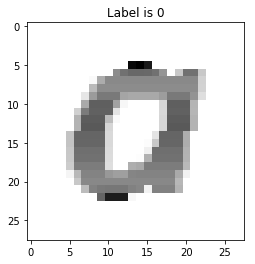

In [367]:
image = loadImage('E:/LICENTA/dllBuilder/output/step6/00.01.1.png')
helper.showImage(image,helper.dictionary[predictImage(network,image)])

# Predict samples

In [368]:
import glob
from PIL import Image
import substring

filenames = [filename for filename in glob.glob('E:/LICENTA/dllBuilder/output/step6/*.png')]

images = []
codes = []

for filename in filenames:
    image = loadImage(filename)
    images.append(image)
    
    code = substring.substringByChar(filename, startChar="\\", endChar=".png")
    code = code[1:]
    array = code.split('.')
    dictionary = {
        "row" : int(array[0]),
        "word" : int(array[1]),
        "letter" : int(array[2])
    }
    codes.append(dictionary)
    
images = np.asarray(images)
predictions = predictImages(network,images)

In [369]:
text = ""
previousRow = 0
previousWord = 0

for i in range(len(predictions)):
    letter = helper.dictionary[predictions[i]]
    if codes[i]['row'] != previousRow:
        text = text + "\n"
        previousRow = codes[i]['row']
        previousWord =0
    if codes[i]['word'] != previousWord:
        text = text + " "
        previousWord = codes[i]['word']  
        
    text = text + letter.lower()

In [370]:
print(text)

noto p0rol0 de 0cce5 pentru 9htdul de octtv0re tr0n5mls pe em0li esteform0ts dtn ulttmele 9 ctfre ole num0rulul de telefon
0soclot contulul tou de lnternet h moble bonklngl xxx
x xxj gha ae activare etoken xnxx
qtl mu tumm ca al aies sa foiose5t etoken ih pentru utlllzarea etoken este necesara parcurgerea u rmatorior pa5l hx
pa5ui 1 descarcarea sl nstalarea apiicatle pe telefon ul tau mobl cautand etokenbcr ln appstore googepay
n sa u wndows store aplcata etoken este dsponbla pentru telefoanele moble cu sstem de operare ios androd
n xx si wndows phone 8n xxxx
pasui 2 actvarea etoken pentru brezau lucan 5e face utlizand datele de ma jos
x n sera etoken bdo x nxxxjxx xx
xxx cod de autorzare 9533583 x
cod ul de actlvare necesar finaiizcarll procesuiu de activare a fo5t transms automat prln sms 1a numarul tau de
teiefon o7274o7244 nreg5trat ln si5tem nnx s
qmpoaanti te rugam sa pastrez acest document deoarece contne dateie necesare reinstaiarli apl1catlei
daca nu actvezi serla etoken tmp a